<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Semanal Nº7
#### Nicolás Salvia


# TS7: Estimación espectral. Ventanas en acción!

Genere la siguiente señal
$$
    x(k) =a0⋅sen(Ω1⋅k)
$$
siendo
$$
    a0=2
$$
$$
    Ω1=Ω0+fr⋅ \frac {2π} {N}
$$
$$
    Ω0= \frac {π}{2}
$$
y la variable aleatoria definida por la siguiente distribución de probabilidad
$$
    fr∼U(−2,2)
$$
Considere 200 realizaciones (muestras tomadas de fr) para cada ventana analizada en la TS6. Se pide entonces:

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import windows as win

In [41]:
#Inicializamos las variables
m = 200
N = 1000
fs = 1000
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

In [42]:
# Inicializamos las grillas
# Grilla de sampleo temporal
tt = np.linspace(0, (N-1), N) * ts
# Grilla de sampleo frecuencial
ff = np.linspace(0, (N-1), N) * df

In [43]:
# Tomamos las 200 muestras
fr = np.random.uniform(low = -2, high= 2, size = m)

In [44]:
# Generamos la señal
a_sign = 2
freq_1 = ((np.pi/2)*fs)/(2*np.pi)
freq_2 = ((np.pi/2) + (fr * ((2*np.pi)/N)))*fs/(2*np.pi)

signal = a_sign * np.sin(2*np.pi * np.outer(tt, freq_2))

Graficamos los histogramas de 
$$
|X^{i}_{w}(Ω_0)|
$$
siendo
$$
|X^{i}_{w}(Ω)|=|F\{x(k)⋅w_i(k)\}|
$$
para la i-ésima ventana de las 5 utilizadas en la TS6. El sesgo y la varianza se definen para este caso como:

In [45]:
# Someto la señal a las distintas ventanas
# Rectangular
signal_rec = signal * np.array(win.boxcar(N)).reshape(N,1)
# Barlett
signal_barlett = signal * np.array(win.bartlett(N)).reshape(N,1)
# Hann
signal_hann = signal * np.array(win.hann(N)).reshape(N,1)
# Blackman
signal_blackman = signal * np.array(win.blackman(N)).reshape(N,1)
# Flat-top
signal_flat = signal * np.array(win.flattop(N)).reshape(N,1)

In [46]:
# Calculamos las transformadas
fft_rec = np.fft.fft(signal_rec, axis = 0)/N
fft_barlett = np.fft.fft(signal_barlett, axis = 0)/N
fft_hann = np.fft.fft(signal_hann, axis = 0)/N
fft_blackman = np.fft.fft(signal_blackman, axis = 0)/N
fft_flat = np.fft.fft(signal_flat, axis = 0)/N

In [47]:
# Calculamos los estimadores
rec_hat = np.abs(fft_rec[ff == 250, :]).flatten()
barlett_hat = np.abs(fft_barlett[ff == 250, :]).flatten()
hann_hat = np.abs(fft_hann[ff == 250, :]).flatten()
blackman_hat = np.abs(fft_blackman[ff == 250, :]).flatten()
flat_hat =  np.abs(fft_flat[ff == 250, :]).flatten()

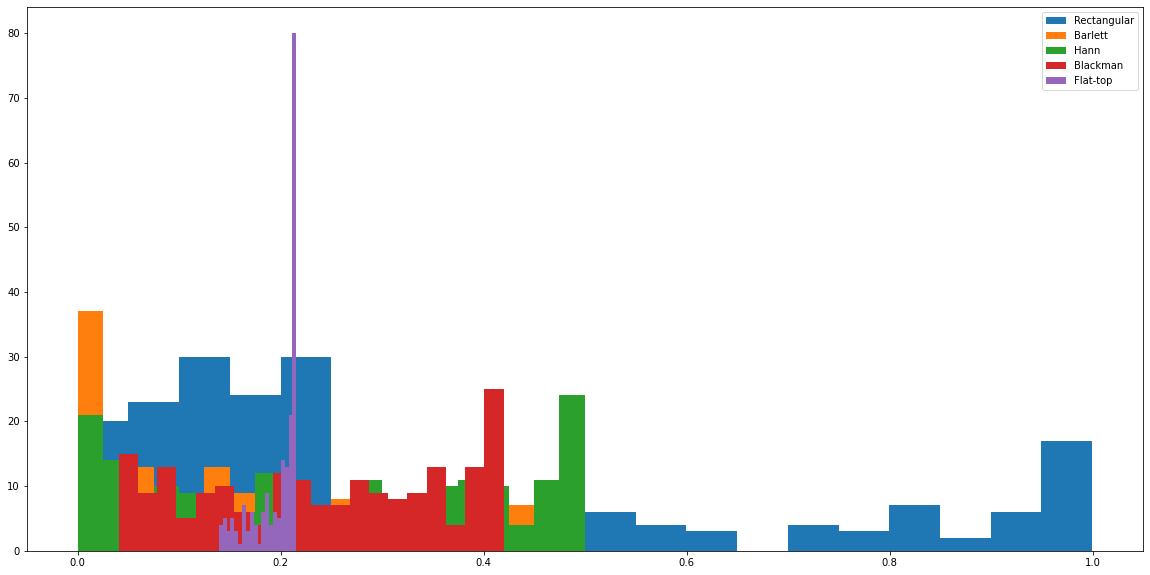

In [48]:
# Graficamos los histogramas
plt.hist(rec_hat, bins=20, label="Rectangular")
plt.hist(barlett_hat, bins=20, label="Barlett" )
plt.hist(hann_hat, bins=20, label="Hann")
plt.hist(blackman_hat, bins=20, label="Blackman")
plt.hist(flat_hat, bins=20, label="Flat-top")
plt.legend(loc="upper right")

Calcule experimentalmente el sesgo y la varianza del siguiente estimador: 
$$
\hat{a_0}=|X^i_w(Ω_0)|
$$
$$
s_a=E\{\hat{a_0}\}−a_0
$$
$$
v_a=var\{\hat{a0}\}=E\{(\hat{a0}−E\{\hat{a0}\})^2\}
$$
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales
$$
E\{\hat{a_0}\}=\hat{μ_a}= \frac {1} {M} \sum_{j=0}^{M−1}\hat{a_j}
$$
$$
s_a=\hat{μ_a}−a_0
$$
$$
v_a = \frac {1} {M} \sum_{j=0}^{M−1}(\hat{a_j} - \hat{μ_a})^2
$$

In [49]:
# Rectangular
sesgo_rec = np.mean(rec_hat) - 2
var_rec = np.var(rec_hat)
# Barlett
sesgo_barlett = np.mean(barlett_hat) - 2
var_barlett = np.var(barlett_hat)
# Hann
sesgo_hann = np.mean(hann_hat) - 2
var_hann = np.var(hann_hat)
# Blackman
sesgo_blackman = np.mean(blackman_hat) - 2
var_blackman = np.var(blackman_hat)
# Flat-top
sesgo_flat = np.mean(flat_hat) - 2
var_flat = np.var(flat_hat)

In [51]:
# Creamos la tabla
data = [['Rectangular', sesgo_rec, var_rec, np.mean(rec_hat)], 
        ['Barlett', sesgo_barlett, var_barlett, np.mean(barlett_hat)], 
        ['Hann', sesgo_hann, var_hann, np.mean(hann_hat)], 
        ['Blackman', sesgo_blackman, var_blackman, np.mean(blackman_hat)], 
        ['Flat-top', sesgo_flat, var_flat, np.mean(flat_hat)]]
df = pd.DataFrame(data, columns = ['Ventana', 'Sesgo', 'Varianza', 'Media'])
df

,Ventana,Sesgo,Varianza,Media
0,Rectangular,-1.664671,0.096985,0.335329
1,Barlett,-1.779705,0.029285,0.220295
2,Hann,-1.750633,0.027138,0.249367
3,Blackman,-1.757682,0.014906,0.242318
4,Flat-top,-1.802655,0.000489,0.197345
